# **Wine Tasting & Review Analysis**

### **Introduction**
This notebook analyzes winemag tasting and review data. The data is sourced from [Maven](mavenanalytics.io).

### **Dataset Description**
Dataset containing ~130k wine reviews published to WineEnthusiast, including taster name, wine price, variety, score, country, county, vineyard, etc.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
# reading in the data
df = pd.read_csv(r'E:\Personal\OneDrive\Git Projects\Portfolio Projects\Portfolio\Data Science & Analytics\_data\maven\winemag-data-130k-v2.csv')

In [3]:
# checking the data
df.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
df.shape

(129971, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


## *Which province has the highest average price? How about of those with at least 10 wines?*

The province with the highest average price is Colares with an average price of $262.50
The province with the lowest average price is Piekenierskloof with an average price of $nan
The province with the highest average price among provinces with more than 10 wines is Madeira with an average price of $115.18


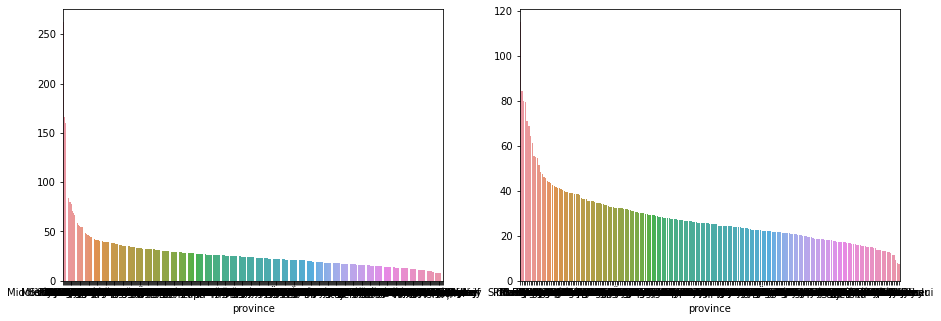

In [6]:
f, axes = plt.subplots(1, 2, figsize=(15, 5))

allprovincesavgprice = df.groupby('province')['price'].mean().sort_values(ascending=False)
fig1 = sns.barplot(x=allprovincesavgprice.index, y=allprovincesavgprice.values, ax=axes[0])

# filtering out provinces with less than 10 wines
filteredprovinces = df.groupby('province').filter(lambda x: len(x) > 10)
filteredprovincesavgprice = filteredprovinces.groupby('province')['price'].mean().sort_values(ascending=False)
fig2 = sns.barplot(x=filteredprovincesavgprice.index, y=filteredprovincesavgprice.values, ax=axes[1])

#TODO: clean up figures so the x axis labels are not overlapping

print(f'The province with the highest average price is {allprovincesavgprice.index[0]} with an average price of ${allprovincesavgprice.values[0]:.2f}')
print(f'The province with the lowest average price is {allprovincesavgprice.index[-1]} with an average price of ${allprovincesavgprice.values[-1]:.2f}')
print(f'The province with the highest average price among provinces with more than 10 wines is {filteredprovincesavgprice.index[0]} with an average price of ${filteredprovincesavgprice.values[0]:.2f}')



## *Does the number of points predict the price of the wine? If so, how strong is the correlation?*


The correlation coefficient between points and price is 0.42


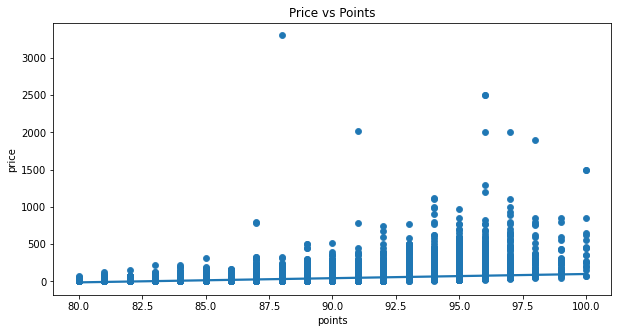

In [7]:
# plotting a scatterplot of points impacting price
figa = sns.scatterplot(x='points', y='price', data=df)
figa.set_title('Price vs Points')
figa.set_xlabel('Points')
figa.set_ylabel('Price')

# resizes the figure
figa.figure.set_size_inches(10, 5)

# adding a regression line
figb = sns.regplot(x='points', y='price', data=df)

# getting the correlation coefficient
pointspricecorr = df['points'].corr(df['price'])
print(f'The correlation coefficient between points and price is {pointspricecorr:.2f}')


## *Dig into reviewer-level trends. Do reviewers tend to specialize in one or two provinces? Do they specialize in certain varieties?*

In [8]:
# getting a count of unique provinces for each reviewers
uniqueprovinces = df.groupby('taster_name')['province'].nunique().sort_values(ascending=False)

# printing the average number of unique provinces reviewed
print(f'The average number of unique provinces reviewed is {uniqueprovinces.mean():.2f}')

# getting a count of unique varieties for each reviewers
uniquevarieties = df.groupby('taster_name')['variety'].nunique().sort_values(ascending=False)

# printing the average number of unique varieties reviewed
print(f'The average number of unique varieties reviewed is {uniquevarieties.mean():.2f}')

The average number of unique provinces reviewed is 34.74
The average number of unique varieties reviewed is 95.68


## *Dig into the 'description' column. What are some of the most common terms used in positive reviews? Negative reviews?*

In [9]:
# going to use sentiment analysis and the points column to analyize the descriptions - using a combination of Transformers and NLTK

# importing necessary libraries
import nltk
import re
import transformers

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [10]:
# first, going to use ntlk to tokenize the descriptions
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

# creating a function to tokenize the descriptions
def desc_tokenizer(description):
    words = nltk.word_tokenize(description)
    words = [word.lower() for word in words if word.isalpha()]
    words = [word for word in words if word not in nltk.corpus.stopwords.words('english')]
    words = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in words]
    return words

# creating a new column with the tokenized descriptions
df['tokenized_desc'] = df['description'].apply(desc_tokenizer)

# checking the Data
df[['description', 'tokenized_desc']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\khari\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\khari\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,description,tokenized_desc
0,"Aromas include tropical fruit, broom, brimston...","[aroma, include, tropical, fruit, broom, brims..."
1,"This is ripe and fruity, a wine that is smooth...","[ripe, fruity, wine, smooth, still, structured..."
2,"Tart and snappy, the flavors of lime flesh and...","[tart, snappy, flavor, lime, flesh, rind, domi..."
3,"Pineapple rind, lemon pith and orange blossom ...","[pineapple, rind, lemon, pith, orange, blossom..."
4,"Much like the regular bottling from 2012, this...","[much, like, regular, bottling, come, across, ..."


In [11]:
# creating a function to get the sentiment of the description

import textblob

def desc_sentiment(description):
    return textblob.TextBlob(description).sentiment.polarity

df['sentiment'] = df['description'].apply(desc_sentiment)

df[['description', 'sentiment']].head()

,description,sentiment
0,"Aromas include tropical fruit, broom, brimston...",0.133333
1,"This is ripe and fruity, a wine that is smooth...",0.220000
2,"Tart and snappy, the flavors of lime flesh and...",0.025000
3,"Pineapple rind, lemon pith and orange blossom ...",0.166667
4,"Much like the regular bottling from 2012, this...",0.306667


The correlation coefficient between sentiment and points is 0.15


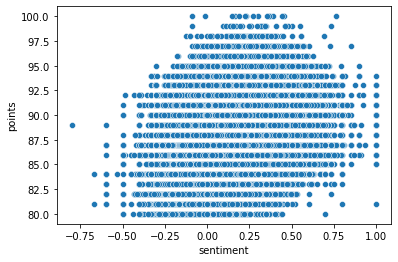

In [12]:
# lets see if there is a correlation between sentiment and points
sentimentpointscorr = df['sentiment'].corr(df['points'])
fige = sns.scatterplot(x='sentiment', y='points', data=df)
print(f'The correlation coefficient between sentiment and points is {sentimentpointscorr:.2f}')

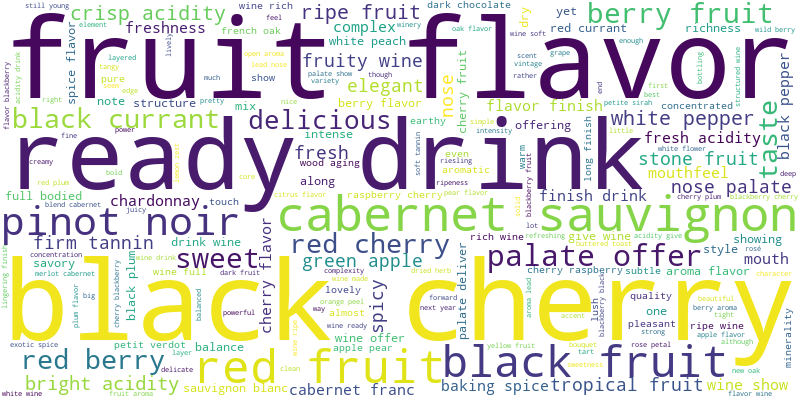

In [13]:
# word cloud of tokenized words from positive descriptions (sentiment > 0)
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df[df['sentiment'] > 0]['tokenized_desc'].sum()))
# plot the WordCloud image
wordcloud_fig = wordcloud.to_image()
display(wordcloud_fig)